## Пример выполнения задания по курсовой работе
### Исходные данные
#### Амплитуда полигармонического сигнала
A = 10 <i>[В]</i>
#### Частоты гармоник
f = [10 20 30 40 50] <i>[Гц]</i>
#### Динамический диапазон АЦП
Umax = 10 <i>[В]</i><br>
Umin = -10 <i>[В]</i><br>
#### Разрядность АЦП
r = 10


In [1]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
# Настройка представления
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Задаем исходные данные
A = 10
f1 = 10
f2 = 20
f3 = 30
f4 = 40
f5 = 50
Umax = 10
Umin = -10
r = 10

In [3]:
# Определяем дополнительные параметры
N = 1024 # Количество отсчетов
T = 0.001 # Период дискретизации сигнала
i = np.arange(N) # Массив номеров отсчетов 1..N
f = np.array([f1, f2, f3, f4, f5]) # Массив частот составляющих полигармонического сигнала

In [4]:
# Генерируем полигармонический сигнал
X = 0
for k in np.arange(f.size):
  X += np.sin(2*np.pi*f[k]*T*i)
X *= A/f.size # Приводим сигнал к заданной амплитуде

# Второй вариант генерации
#X = (np.sin(2*np.pi*f[0]*T*i) + 
#     np.sin(2*np.pi*f[1]*T*i) + 
#     np.sin(2*np.pi*f[2]*T*i) + 
#     np.sin(2*np.pi*f[3]*T*i) + 
#     np.sin(2*np.pi*f[4]*T*i)) * A / f.size

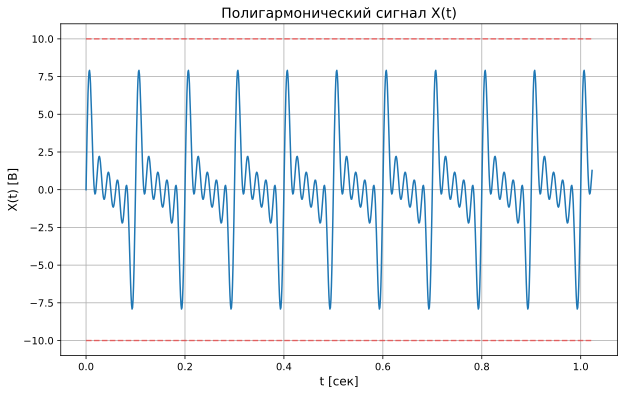

In [5]:
# Визуализация полигармонического сигнала
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(i*T, X)
plt.plot([i[0]*T, i[-1]*T], [A, A], 'r--', alpha=0.5)
plt.plot([i[0]*T, i[-1]*T], [-A, -A], 'r--', alpha=0.5)
plt.title('Полигармонический сигнал X(t)', fontsize=14)
plt.xlabel('t [сек]', fontsize=12)
plt.ylabel('X(t) [В]', fontsize=12)
plt.grid(True)
plt.savefig(r'C:\TEMP\fig_1.png')
plt.show()

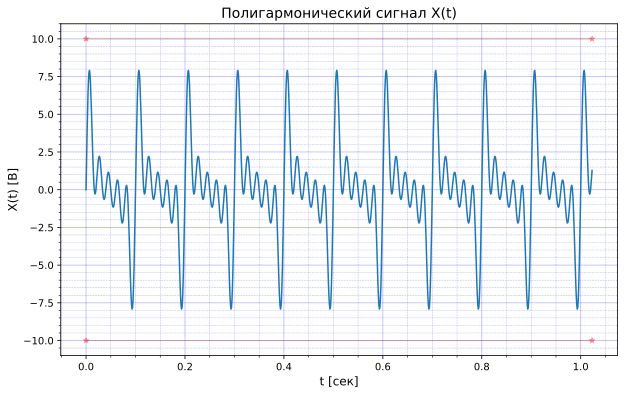

In [6]:
# Второй способ отрисовки (кастомизация графика)
from matplotlib.ticker import (AutoMinorLocator)
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Полигармонический сигнал X(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('X(t) [В]', fontsize=12)
ax.plot(i*T, X)
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
fig.savefig(r'C:\TEMP\fig_1.png')

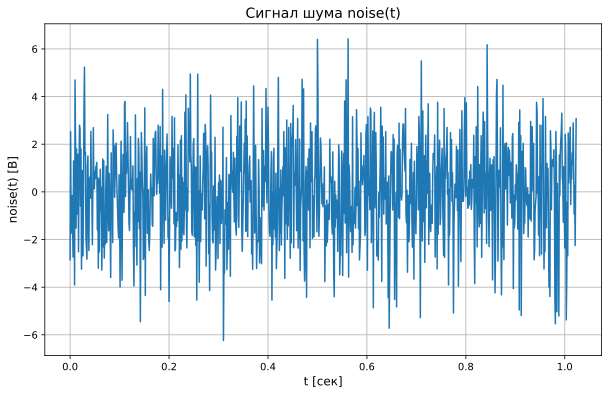

In [7]:
# Генерируем шум
# np.random.seed(123) # Фиксируем генератор случайных чисел
# noise = np.random.normal(0, A*0.2, N)
rng = np.random.default_rng(12345)
noise = rng.normal(0, A*0.2, N)
# Строим график шума
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(i*T, noise)
plt.title('Сигнал шума noise(t)', fontsize=14)
plt.xlabel('t [сек]', fontsize=12)
plt.ylabel('noise(t) [В]', fontsize=12)
plt.grid(True)
plt.savefig(r'C:\TEMP\fig_2.png')
plt.show()

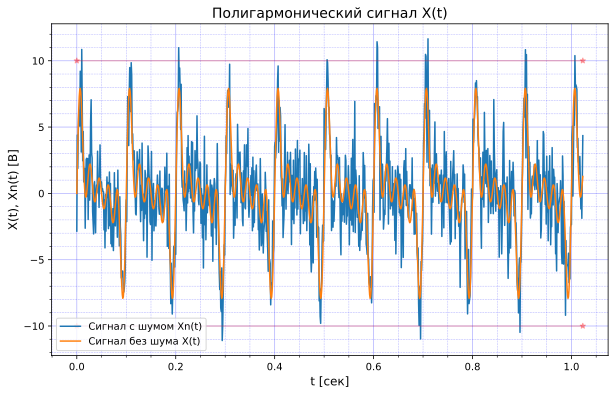

In [8]:
# Накладываем шум на полезный сигнал и строим график
Xn = X + noise
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Полигармонический сигнал X(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('X(t), Xn(t) [В]', fontsize=12)
ax.plot(i*T, Xn, label='Сигнал c шумом Xn(t)')
ax.plot(i*T, X, label='Сигнал без шума X(t)')
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_3.png')

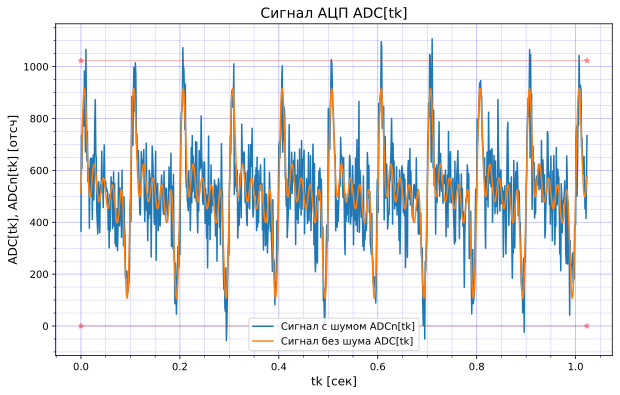

In [9]:
# Модель аналого-цифрового преобразователя (АЦП)
Xmin = A # Верхняя граница сигнала X(t)
Xmax = -A # Нижняя граница сигнала X(t)
Xadc_max = np.power(2, r) - 1 # Верхняя граница АЦП
Xadc_min = 0 # Нижняя граница АЦП
# Чистый сигнал
C = Xadc_max-(X - Xmin)*(Xadc_max - Xadc_min)/(Xmax - Xmin)
c = C.round() # Округляем до целого
# Сигнал с шумом
Cn = Xadc_max-(Xn - Xmin)*(Xadc_max - Xadc_min)/(Xmax - Xmin)
cn = Cn.round() # Округляем до целого
# Строим график оцифрованного сигнала
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Сигнал АЦП ADC[tk]', fontsize=14)
ax.set_xlabel('tk [сек]', fontsize=12)
ax.set_ylabel('ADC[tk], ADCn[tk] [отсч]', fontsize=12)
ax.plot(i*T, cn, label='Сигнал c шумом ADCn[tk]')
ax.plot(i*T, c, label='Сигнал без шума ADC[tk]')
ax.plot([i[0]*T, i[-1]*T], [Xadc_max, Xadc_max], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-Xadc_min, -Xadc_min], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_4.png')

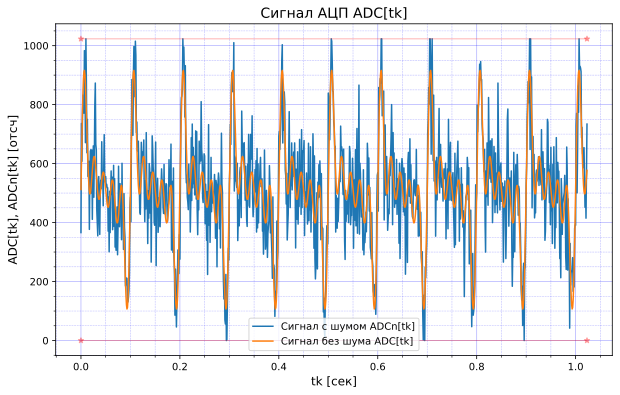

In [10]:
# Сигнал, превышающий динамический диапазон - отсекается
cn[cn > Xadc_max] = Xadc_max
cn[cn < Xadc_min] = Xadc_min
# Строим график оцифрованного сигнала
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Сигнал АЦП ADC[tk]', fontsize=14)
ax.set_xlabel('tk [сек]', fontsize=12)
ax.set_ylabel('ADC[tk], ADCn[tk] [отсч]', fontsize=12)
ax.plot(i*T, cn, label='Сигнал c шумом ADCn[tk]')
ax.plot(i*T, c, label='Сигнал без шума ADC[tk]')
ax.plot([i[0]*T, i[-1]*T], [Xadc_max, Xadc_max], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-Xadc_min, -Xadc_min], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_5.png')

In [11]:
# Преобразование Фурье (прямое)
Xf=np.fft.fft(cn)/len(cn)
Xf=np.fft.fftn(cn)
# Амплитудный спектр
Af=np.abs(Xf)
# Разрешение по частоте
b=1/(N*T)
# Массив частот
Ff=np.arange(N)*b

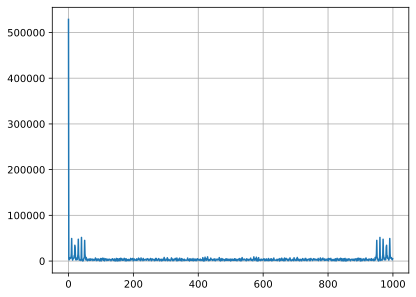

In [12]:
# График амплитудного спектра
plt.plot(Ff, Af)
plt.grid(True)

In [13]:
# Поскольку на графике присутствует постоянная составляюща
# (наблюдается всплеск на нулевой частоте),
# Рекомендуется выполнить центрирование ряда и повторить расчет
cn_mean = np.mean(cn) # Запоминаем (понадобится при восстановлении сигнала)
cn = cn - cn_mean
# Преобразование Фурье (прямое)
Xf=np.fft.fft(cn)/len(cn)
Xf=np.fft.fftn(cn)
# Амплитудный спектр
Af=np.abs(Xf)

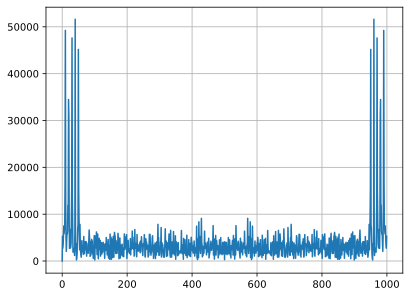

In [14]:
# График амплитудного спектра
plt.plot(Ff, Af)
plt.grid(True)

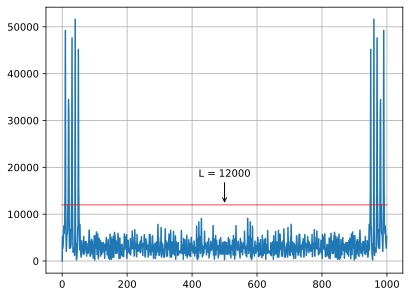

In [15]:
# Определяем уровень отсечки (фильтрации)
L=12000
annotation = 'L = '+str(L)

fig, ax = plt.subplots()
ax.plot(Ff, Af)
ax.plot([Ff[0], Ff[-1]], [L, L], 'r-', alpha=0.5)
 
ax.annotate(annotation, xy=(f[f.size-1]*10, L), xytext=(f[f.size-1]*10, L*1.5), 
            ha='center', arrowprops={'arrowstyle':'->'})
plt.grid(True)
plt.show()

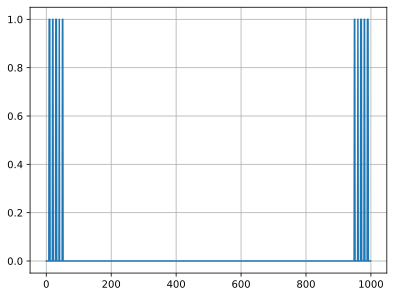

In [16]:
# Расчет окна фильтра
Wf = np.where(Af>L,1,0)
plt.plot(Ff, Wf)
plt.grid(True)

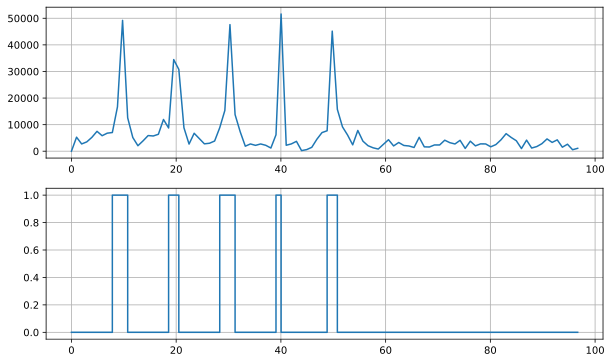

In [17]:
# Отрисовка фигуры в двух осях
plt.figure(figsize=(10, 6), dpi=300)
# Амплитудный спектр
plt.subplot(2,1,1)
plt.plot(Ff[:100], Af[:100])
plt.grid(True)
# Окно фильтра
plt.subplot(2,1,2)
plt.step(Ff[:100], Wf[:100])
plt.grid(True)

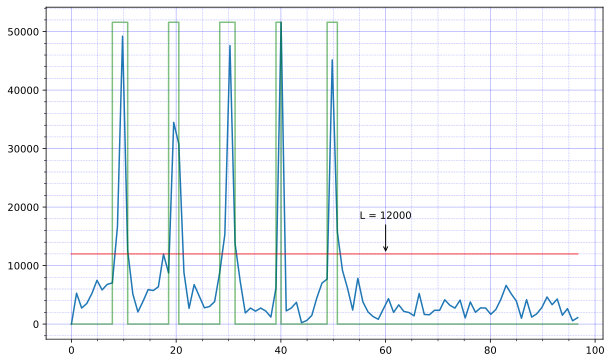

In [18]:
Np = 100
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.plot(Ff[:Np], Af[:Np])
ax.plot([Ff[0], Ff[Np-1]], [L, L], 'r-', alpha=0.5)
ax.step(Ff[:Np], Wf[:Np]*Af.max(), 'g-', alpha=0.5)
 
ax.annotate(annotation, xy=(f[f.size-1]+f[0], L), xytext=(f[f.size-1]+f[0], L*1.5), 
            ha='center', arrowprops={'arrowstyle':'->'})
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
plt.grid(True)
plt.show()
fig.savefig(r'C:\TEMP\fig_6.png')

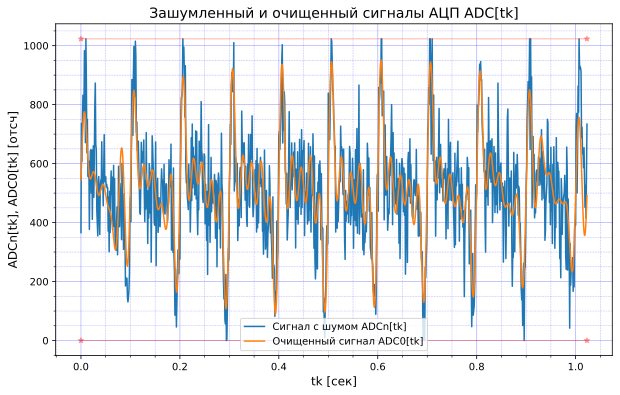

In [19]:
# Удаление составляющих комплексного спектра, соответствующих шуму
Xf0=Xf*Wf # Накладываем окно на спектр сигнала
# Выполняем обратное преобразование
# и оставляем только действительную часть
c0=np.real(np.fft.ifft(Xf0))/T
c0=np.real(np.fft.ifftn(Xf0))
# Восстанавливаем сигналы с учетом постоянной составляющей
c0 = c0 + cn_mean
cn = cn + cn_mean
# Визуализация
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Зашумленный и очищенный сигналы АЦП ADC[tk]', fontsize=14)
ax.set_xlabel('tk [сек]', fontsize=12)
ax.set_ylabel('ADCn[tk], ADC0[tk] [отсч]', fontsize=12)
ax.plot(i*T, cn, label='Сигнал c шумом ADCn[tk]')
ax.plot(i*T, c0, label='Очищенный сигнал ADC0[tk]')
ax.plot([i[0]*T, i[-1]*T], [Xadc_max, Xadc_max], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-Xadc_min, -Xadc_min], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_7.png')

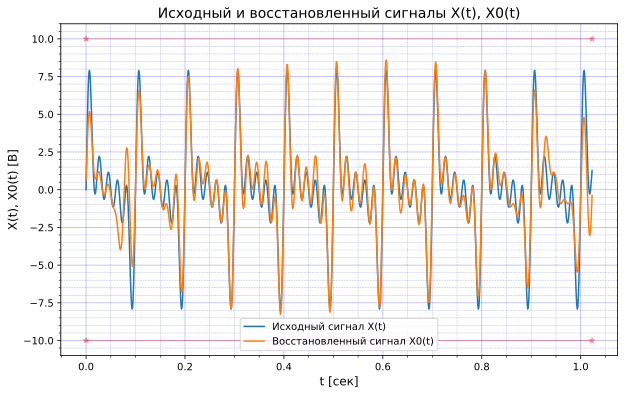

In [20]:
# Модель ЦАП
X0=(Xadc_max - c0)*(Xmax - Xmin)/(Xadc_max - Xadc_min) + Xmin
# Визуализация
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Исходный и восстановленный сигналы X(t), X0(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('X(t), X0(t) [В]', fontsize=12)
ax.plot(i*T, X, label='Исходный сигнал X(t)')
ax.plot(i*T, X0, label='Восстановленный сигнал X0(t)')
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_8.png')

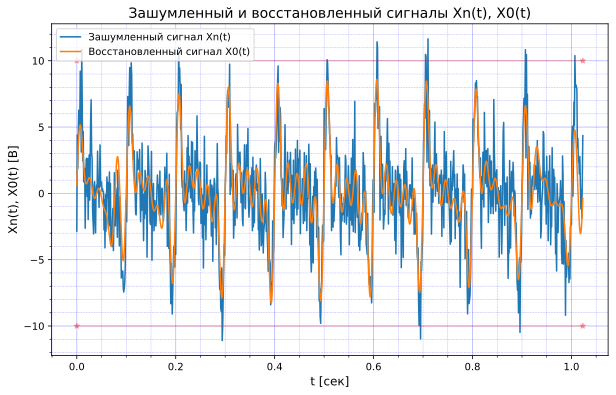

In [21]:
# Визуализация
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Зашумленный и восстановленный сигналы Xn(t), X0(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('Xn(t), X0(t) [В]', fontsize=12)
ax.plot(i*T, Xn, label='Зашумленный сигнал Xn(t)')
ax.plot(i*T, X0, label='Восстановленный сигнал X0(t)')
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_9.png')

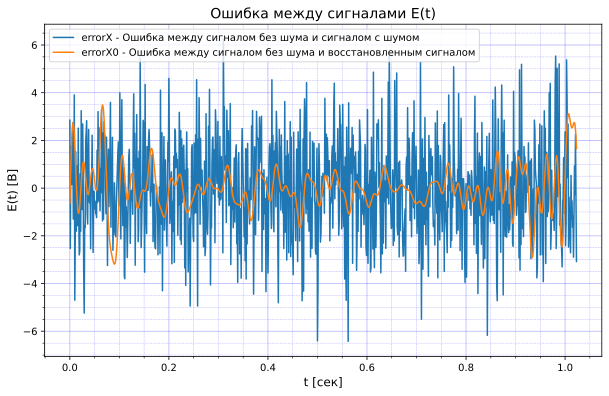

In [22]:
# Расчет и анализ ошибки
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Ошибка между сигналом без шума и сигналом с шумом
errorX = X - Xn
# Ошибка между сигналом без шума и восстановленным сигналом
errorX0 = X - X0

# Визуализация
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Ошибка между сигналами E(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('E(t) [В]', fontsize=12)
ax.plot(i*T, errorX, label='errorX - Ошибка между сигналом без шума и сигналом с шумом')
ax.plot(i*T, errorX0, label='errorX0 - Ошибка между сигналом без шума и восстановленным сигналом')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
fig.savefig(r'C:\TEMP\fig_10.png')

In [23]:
# Расчет статистических характеристик
print('Уровень L: {0}\n'.format(L))
print('R2 errorX: {0}\n'.format(r2_score(X, Xn)))
print('R2 errorX0: {0}\n'.format(r2_score(X, X0)))
print('MAE errorX: {0}\n'.format(mean_absolute_error(X, Xn)))
print('MAE errorX0: {0}\n'.format(mean_absolute_error(X, X0)))
print('MSE errorX: {0}\n'.format(mean_squared_error(X, Xn)))
print('MSE errorX0: {0}\n'.format(mean_squared_error(X, X0)))

Уровень L: 12000

R2 errorX: 0.5948683014374301

R2 errorX0: 0.9149933352709244

MAE errorX: 1.6193652991800627

MAE errorX0: 0.6437078566822991

MSE errorX: 4.137725320027887

MSE errorX0: 0.868197256024622

